### Note:
- This notebook is not anything new, but is a way to make life easier for the report-maker with respect to Graph 5.
- *Assumption Made: Graph5 requires us to reconstruct Graph3 but for different values of K, as specified.*

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def getcontents(filepath):
    f = open(filepath, "r")
    bigarr = []
    for line in f:
        arr = np.array(line.replace("\n", "").split("\t"))
        # print(line)
        bigarr.append(arr)
    bigarr = np.array(bigarr)
    return bigarr

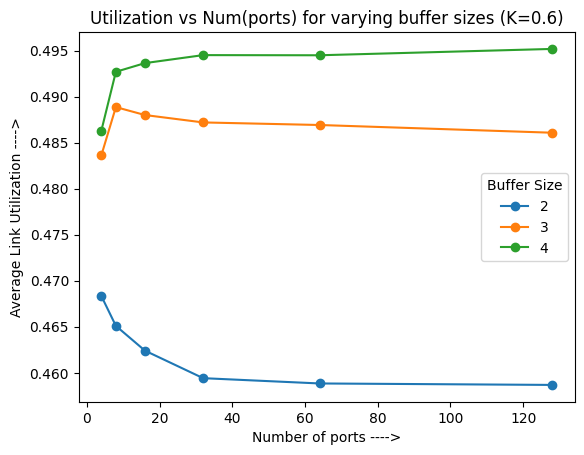

In [5]:
### for Graph5, it is easier to just run graph2.sh with different values of K coded in, rather than reparse output files all over again

all_data = getcontents("../output/output2.out")
# print(all_data)
B = np.array(all_data[:, 0]).astype(int) # diff lines
N = np.array(all_data[:, 1]).astype(int) # x axis
avg_LU = np.array(all_data[:, -1]).astype(float) # y axis

series5 = {}
for i in B:
    if i not in series5:
        series5[i] = []
x_vals = []
for i in N:
    if i not in x_vals:
        x_vals.append(i)
for i in range(len(avg_LU)):
    series5[B[i]].append(avg_LU[i])

# print(series)

plt.figure()
plt.xlabel("Number of ports ---->")
plt.ylabel("Average Link Utilization ---->")
for i in series5:
    plt.plot(x_vals, series5[i], marker='o', label=str(i))

plt.legend(title="Buffer Size")
plt.title("Utilization vs Num(ports) for varying buffer sizes (K=0.6)")

plt.savefig("../images/img5-k6.png")
plt.show()